In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values (0-255 -> 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [4]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(10, activation='softmax')  # Output layer
])


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


In [7]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=25,
                    validation_data=(x_test, y_test),
                    verbose=1)


Epoch 1/25
782/782 [==============================] - 70s 88ms/step - loss: 1.7275 - accuracy: 0.3591 - val_loss: 1.3157 - val_accuracy: 0.5110
Epoch 2/25
782/782 [==============================] - 65s 83ms/step - loss: 1.4108 - accuracy: 0.4962 - val_loss: 1.1561 - val_accuracy: 0.5797
Epoch 3/25
782/782 [==============================] - 66s 84ms/step - loss: 1.2878 - accuracy: 0.5441 - val_loss: 1.0735 - val_accuracy: 0.6249
Epoch 4/25
782/782 [==============================] - 66s 84ms/step - loss: 1.2055 - accuracy: 0.5794 - val_loss: 1.0093 - val_accuracy: 0.6422
Epoch 5/25
782/782 [==============================] - 66s 84ms/step - loss: 1.1434 - accuracy: 0.6001 - val_loss: 1.0454 - val_accuracy: 0.6355
Epoch 6/25
782/782 [==============================] - 66s 84ms/step - loss: 1.0927 - accuracy: 0.6192 - val_loss: 0.9170 - val_accuracy: 0.6834
Epoch 7/25
782/782 [==============================] - 66s 85ms/step - loss: 1.0510 - accuracy: 0.6376 - val_loss: 0.8718 - val_accuracy:

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 76.72%


In [10]:
model.save('image_classification_model.h5')

In [16]:
def predict_image(filepath):
    img = image.load_img(filepath, target_size=(32, 32))  # Resize to match input shape
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    return class_labels[class_index]


1/1 [==============================] - 0s 134ms/step


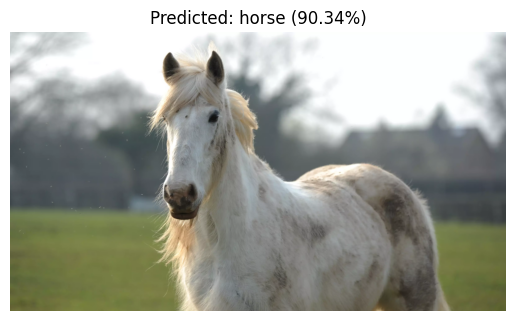

Class Probabilities: [4.5701083e-02 1.8544575e-04 3.1524769e-03 7.4055803e-04 4.1537385e-02
 3.3539163e-03 9.1148067e-06 9.0344149e-01 1.8507225e-04 1.6934051e-03]
Predicted Class: horse with 90.34% confidence.


In [26]:

# Load the trained model
model = tf.keras.models.load_model('image_classification_model.h5')

# Define class labels (adjust according to your dataset)
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def predict_and_display(filepath, model):
    # Load and preprocess the image
    img = image.load_img(filepath, target_size=(32, 32))  # Resize to match model input
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100  # Confidence in percentage

    # Display the image with prediction and confidence
    plt.imshow(image.load_img(filepath))
    plt.title(f"Predicted: {predicted_class_label} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

    # Print detailed predictions
    print(f"Class Probabilities: {predictions[0]}")
    print(f"Predicted Class: {predicted_class_label} with {confidence:.2f}% confidence.")

# Example usage
image_path = 'horse1.jpeg'  # Replace with your image file path
predict_and_display(image_path, model)


1/1 [==============================] - 0s 106ms/step


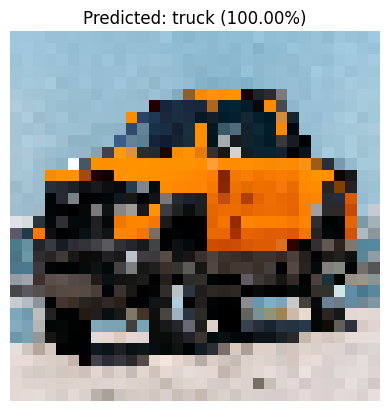

In [30]:
# Load the trained model
model = tf.keras.models.load_model('image_classification_model.h5')
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def predict_image(filepath):
    img = image.load_img(filepath, target_size=(32, 32))  # Resize image
    img_array = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)  # Normalize and batchify
    predictions = model.predict(img_array)
    predicted_class = class_labels[np.argmax(predictions)]
    confidence = np.max(predictions) * 100

    # Display image with prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

# Example usage
predict_image('pickup.jpg')  # Replace with your image path
